# 📘 Capstone 2: Olist Sales Growth Strategy

## 🧠 Problem Statement

**How can Olist experience significant increase in sales over the next two years**  

---

## 🎯 Project Objectives

-Identify high-performing product categories and customer preferences 

-Analyze seasonal demand patterns to optimize campaign timing and stock levels 

-Improve product performance by identifying high-sale products with low ratings 

-Increase visibility of undervalued products by identifying low-sale but high-rated items 

-Enhance customer and seller loyalty by analyzing top-performing buyers and sellers 

---

## 📊 Exploratory Data Analysis

### 1. 📈 Correlation Analysis

- Delivery time vs review score  
- Product price vs number of sales  
- Freight value vs purchase decision

### 2. 🛍️ Product-Level Analysis

- Analyze demand and sales trends at product category level  
- Identify products with high sales but low customer ratings  
- Detect products with high ratings but low sales  
- Identify products frequently purchased together
- Find the seasonality of products  

---

### 3. 🧑‍🤝‍🧑 Customer Segmentation

- Cluster customers based on:
  - Purchase frequency  
  - Spending amount  
  - Preferred product categories  
  - Review patterns

---

### 4. 🛒 Seller Performance

- Evaluate sales volume, review ratings, and delivery delays  
- Identify top and underperforming sellers

---

### 5. 🌎 Regional-Level Demand Analysis

- Evaluate demand across states 
- Highlight top-performing regions with product demands

---


 


In [2]:
# Import the modules
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")

In [3]:
Final_Data = pd.read_csv("Ecommerce_Data.csv")

In [4]:
Final_Data.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_photos_qty,product_weight_g,product_category,Product_Volume,...,customer_zip_code,customer_city,customer_state,seller_zip_code,seller_city,seller_state,product_main_category,customer_id_short,seller_id_short,order_id_short
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,4.0,650.0,cool_stuff,3528.0,...,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,"Food, Drinks & Pet Supplies",c001,s001,p001
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2.0,30000.0,pet_shop,60000.0,...,15775,santa fe do sul,SP,3471,sao paulo,SP,"Food, Drinks & Pet Supplies",c002,s002,p002
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2.0,3050.0,furniture_decor,14157.0,...,35661,para de minas,MG,37564,borda da mata,MG,Home & Furniture,c003,s003,p003
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,1.0,200.0,perfumery,2400.0,...,12952,atibaia,SP,14403,franca,SP,"Health, Beauty & Personal Care",c004,s004,p004
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,1.0,3750.0,garden_tools,42000.0,...,13226,varzea paulista,SP,87900,loanda,PR,Home Improvement & Tools,c005,s005,p005


In [5]:
Final_Data.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_photos_qty               0
product_weight_g                 0
product_category                 0
Product_Volume                   0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_answer_timestamp          0
customer_zip_code                0
customer_city                    0
customer_state                   0
seller_zip_code                  0
seller_city                      0
seller_state                     0
product_main_category            0
customer_id_short                0
seller_id_short     

In [6]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113208 entries, 0 to 113207
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113208 non-null  object 
 1   order_item_id                  113208 non-null  int64  
 2   product_id                     113208 non-null  object 
 3   seller_id                      113208 non-null  object 
 4   price                          113208 non-null  float64
 5   freight_value                  113208 non-null  float64
 6   product_photos_qty             113208 non-null  float64
 7   product_weight_g               113208 non-null  float64
 8   product_category               113208 non-null  object 
 9   Product_Volume                 113208 non-null  float64
 10  customer_id                    113208 non-null  object 
 11  order_status                   113208 non-null  object 
 12  order_purchase_timestamp      

### 1. OBSERVE CORRELATION BETWEEN DIFFERENT VARIABLES

In [7]:
Final_Data = Final_Data.astype({'order_item_id': str,'customer_zip_code': str, 'seller_zip_code': str})

In [8]:
#Calculate delivery delay
# Convert string date columns to datetime format first

Final_Data['order_delivered_customer_date'] = pd.to_datetime(Final_Data['order_delivered_customer_date'])
Final_Data['order_purchase_timestamp'] = pd.to_datetime(Final_Data['order_purchase_timestamp'])
Final_Data['order_estimated_delivery_date'] = pd.to_datetime(Final_Data['order_estimated_delivery_date'])

# Now calculate the time differences
Final_Data['actual_delivery_time(days)'] = (Final_Data['order_delivered_customer_date'] - Final_Data['order_purchase_timestamp']).dt.days
Final_Data['estimated_delivery_time(days)'] = (Final_Data['order_estimated_delivery_date'] - Final_Data['order_purchase_timestamp']).dt.days
Final_Data['delivery_delay'] = Final_Data['actual_delivery_time(days)'] - Final_Data['estimated_delivery_time(days)']
Final_Data['delivery_delay'] = Final_Data['delivery_delay'].apply(lambda x: max(0, x))  # Set negative values to 0


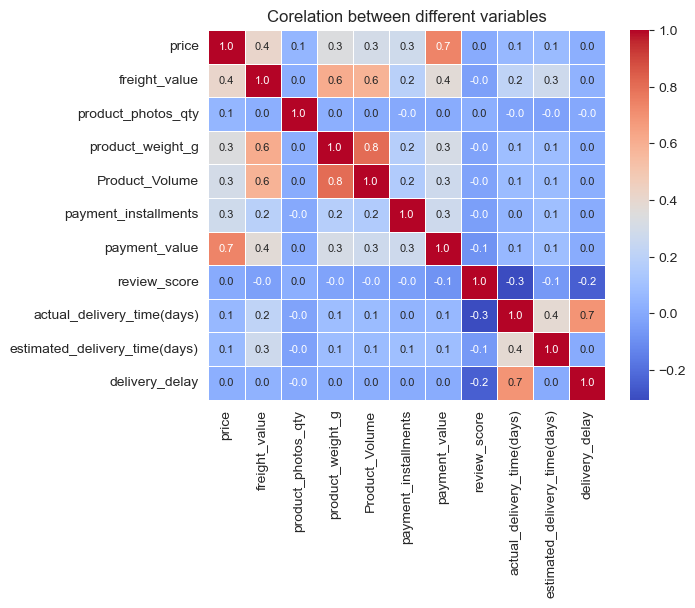

In [9]:
#Creating Heatmap to find corelation between diff variables# First, select only the numerical columns
numerical_columns = Final_Data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = Final_Data[numerical_columns]
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()#plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix, annot = True, fmt = '.1f',cmap = 'coolwarm',linewidths = 0.5,annot_kws = {"size": 8})
plt.title('Corelation between different variables')
plt.show()

- Price and payment value have a postive corelation i.e if we purchase high priced products, the payment value will increase.
- Similarly freight value is highly corelated with product_weight and product_volume. 
- Product_weight and product_volume are also highly corelated. 
- There is also a high corelation between delivery_delay and actual_delivery_time.
- Ideally delivery delay and review score are negatively corelated, but here we don't see any corelation between them

### 2. PRODUCT LEVEL ANALYSIS

## i. Identify demand and sales trend at product category level

/var/folders/6r/x6qm1ldj3712kcmmxwrr5ydc0000gn/T/ipykernel_32991/713279210.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Best_revenue_product.index, rotation=45, ha='right')


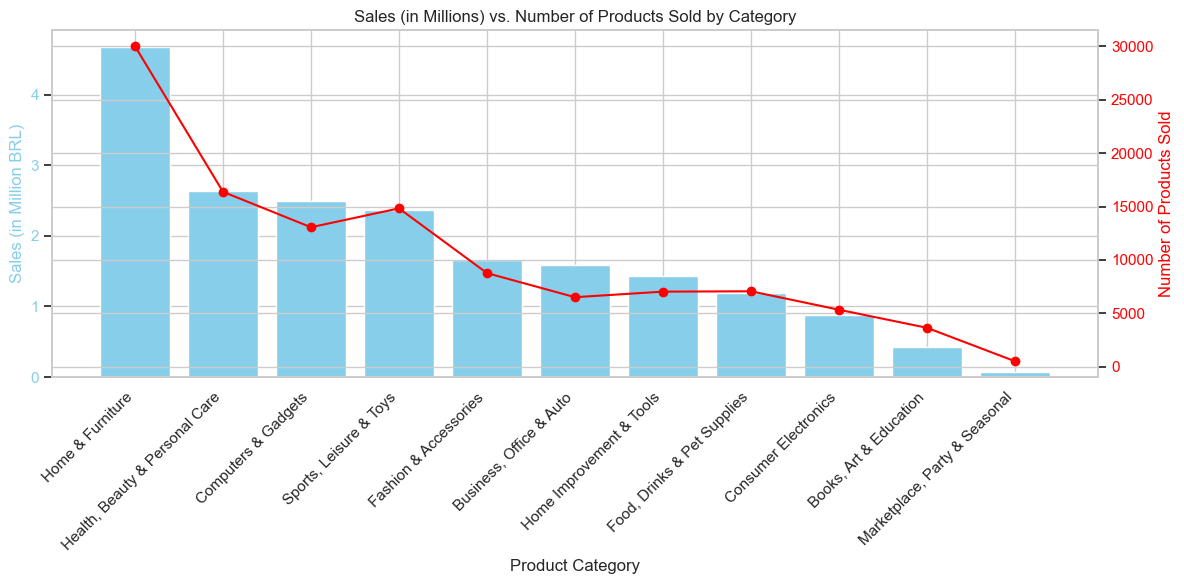

In [299]:
#sales in each category
Best_revenue_product = Final_Data.groupby('product_main_category').agg(no_of_products_sold = ('product_id','count'),sales = ('payment_value','sum')).sort_values('sales',ascending = False)

# Convert sales to millions
Best_revenue_product['sales_million'] = Best_revenue_product['sales'] / 1_000_000

# Set up plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for sales in millions
ax1.bar(Best_revenue_product.index, Best_revenue_product['sales_million'], color='skyblue')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Sales (in Million BRL)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(Best_revenue_product.index, rotation=45, ha='right')

# Line plot for number of products sold
ax2 = ax1.twinx()
ax2.plot(Best_revenue_product.index, Best_revenue_product['no_of_products_sold'], color='red', marker='o')
ax2.set_ylabel('Number of Products Sold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Sales (in Millions) vs. Number of Products Sold by Category')
plt.tight_layout()
plt.show()

The above data shows the number of products sold and total sales by product category. 

- Home & Furniture is the top-performing category in both sales volume and revenue, indicating strong and consistent customer demand.
- Computers & Gadgets and Sports, Leisure & Toys also show high revenue, suggesting they are high-value and frequently purchased categories.
- Categories like Books, Art & Education and Marketplace, Party & Seasonal have low sales and revenue—possibly seasonal or niche, and may need targeted promotions.
- Strategic focus on top categories can drive growth, while low-performing segments may need repositioning or bundling strategies to boost performance.

### ii. Identify products with high number sales but low customer ratings

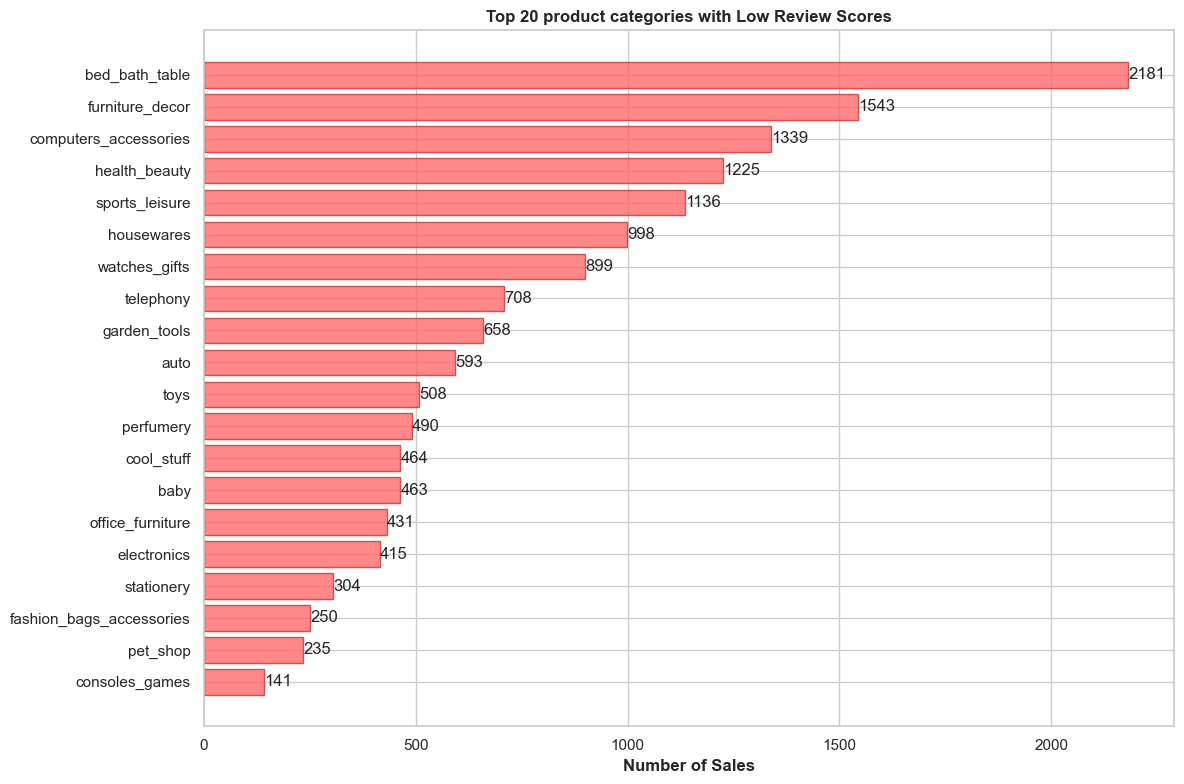

In [300]:
# Filter data for low review scores (2 and less)
low_review_score = Final_Data[Final_Data['review_score'] <= 2]

# Group by product categories and count the number of sales
data = low_review_score.groupby(['product_category']).size().reset_index(name='No of Sale').sort_values('No of Sale',ascending = False).head(20)


# Sort by number of sales (ascending) and show the top 20
data = data.sort_values('No of Sale', ascending=True)


# Plot horizontal bar chart
plt.figure(figsize = (12,8))
plt.barh(data['product_category'], data['No of Sale'], color = '#FF6B6B', edgecolor='#D32F2F', alpha=0.8)

# add labels to each bar
for i,v in enumerate(data['No of Sale']):
    plt.text(v + 1, i, str(v), va = 'center')
    

plt.xlabel('Number of Sales', fontsize = 12, fontweight = 'bold')
plt.title('Top 20 product categories with Low Review Scores',fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()



- The above products like bed bath table, furniture decor, computer accessories are high in demand, but customer satisfaction is poor, risking future revenue and brand reputation.
- Issues may lie in product quality, delivery delays, packaging or descriptions.
- Focused actions like quality checks, better supplier collaboration, or clearer product info can improve ratings. 
- Improving the customer retention for these high-selling products can lead to higher retention and long-term growth.

### iii. Detect products with high ratings but low sales  


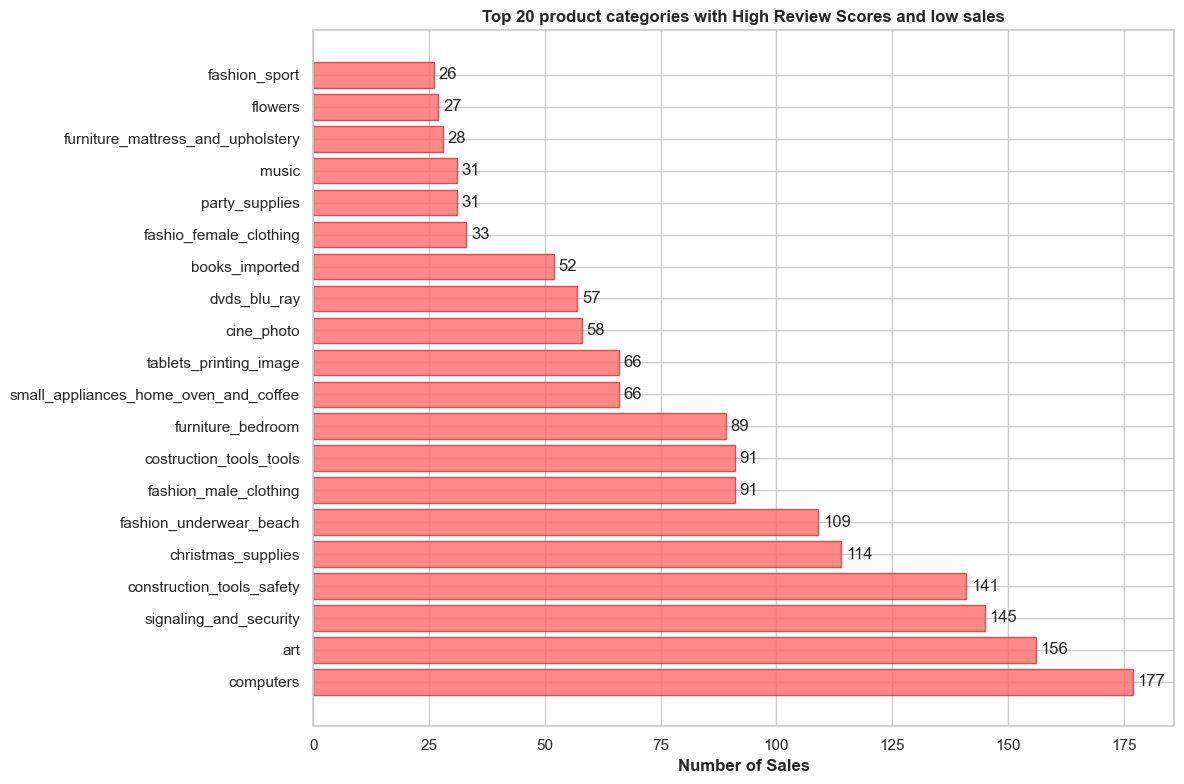

In [301]:
# Filter data for high review scores (4 and above)
high_review_score = Final_Data[Final_Data['review_score'] >= 4]

# Group by product categories and count the number of sales
high_review_score_group = high_review_score.groupby(['product_main_category', 'product_category']).size().reset_index(name='No of Sale')

# Filter for categories with more than 10 sales
high_review_score_filtered = high_review_score_group[high_review_score_group['No of Sale'] > 20]

# Sort by number of sales (ascending) and show the top 10
high_review_score_sorted = high_review_score_filtered.sort_values('No of Sale', ascending=True).head(20)
data1 = high_review_score_sorted.sort_values('No of Sale', ascending=False)
# Plot horizontal bar chart
plt.figure(figsize = (12,8))
plt.barh(data1['product_category'], data1['No of Sale'], color = '#FF6B6B', edgecolor='#D32F2F', alpha=0.8)

# add labels to each bar
for i,v in enumerate(data1['No of Sale']):
    plt.text(v + 1, i, str(v), va = 'center')
    

plt.xlabel('Number of Sales', fontsize = 12, fontweight = 'bold')
plt.title('Top 20 product categories with High Review Scores and low sales',fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()


- Categories like **computers**, **art**, **construction tools**, and **furniture** are high-value, long-lifecycle items — low sales are natural, but high reviews indicate strong product satisfaction.
- **Small appliances**, **security tools**, and **home & kitchen electronics** also receive high reviews but are purchased infrequently. Highlight product quality and reliability in marketing.
- **Fashion categories** (male, female, underwear/beach), **books**, **music**, **dvds**, **flowers**, and **party supplies** are more suitable for repeat purchases. High reviews in these areas indicate an opportunity to **increase sales through better visibility, promotions, or subscriptions**.
- **Christmas supplies**, **tablets**, **cine/photo products**, and **signaling tools** may benefit from **seasonal campaigns** or **bundled deals**.
- Recommend prioritizing high-review, frequently usable products for marketing expansion while leveraging high-value items to **build trust and brand credibility**.

### iv. Identify products frequently purchased together

In [302]:
from itertools import combinations
from collections import Counter

# Filter data to include data having multiple products under one order_id
# Count number of products per order
order_counts = Final_Data.groupby('order_id_short').size()
# Filter orders with more than 1 product
multi_orders = order_counts[order_counts >1].index
# Filter the dataframe with orders having multiple products
df_filtered = Final_Data[Final_Data['order_id_short'].isin(multi_orders)]

#Group products per order
order_products = df_filtered.groupby('order_id_short')['product_category'].apply(list)

# Generate product pair form each order
pair_counter = Counter()
for products in order_products:
    pairs = combinations(sorted(set(products)),2)
    pair_counter.update(pairs)
# Convert to dataframe
pair_df = pd.DataFrame(pair_counter.items(), columns = ['product_pair','count'])
pair_df = pair_df.sort_values('count',ascending = False)
print(pair_df.head(20))

                                     product_pair  count
12              (bed_bath_table, furniture_decor)     69
45                 (bed_bath_table, home_confort)     43
55                  (furniture_decor, housewares)     24
27                   (bed_bath_table, housewares)     20
42                             (baby, cool_stuff)     20
5                                    (baby, toys)     19
10                         (baby, bed_bath_table)     17
69                (furniture_decor, garden_tools)     16
37                (health_beauty, sports_leisure)     14
21           (furniture_decor, home_construction)     13
76                     (health_beauty, perfumery)     12
11                        (baby, furniture_decor)     12
128                    (garden_tools, housewares)     11
33                (bed_bath_table, health_beauty)     11
87                   (housewares, sports_leisure)     11
86   (construction_tools_lights, furniture_decor)     11
83                   (bed_bath_

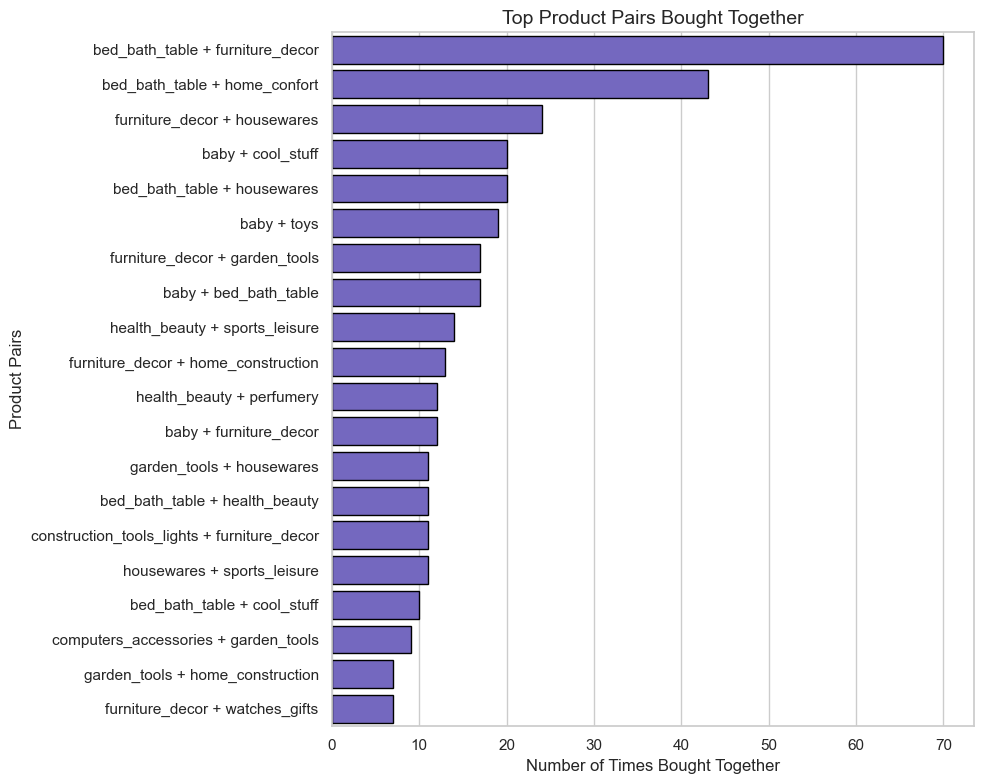

In [303]:
# Sample data (replace with your actual DataFrame)
data = {
    'pair': [
        ('bed_bath_table', 'furniture_decor'),
        ('bed_bath_table', 'home_confort'),
        ('furniture_decor', 'housewares'),
        ('baby', 'cool_stuff'),
        ('bed_bath_table', 'housewares'),
        ('baby', 'toys'),
        ('furniture_decor', 'garden_tools'),
        ('baby', 'bed_bath_table'),
        ('health_beauty', 'sports_leisure'),
        ('furniture_decor', 'home_construction'),
        ('baby', 'furniture_decor'),
        ('health_beauty', 'perfumery'),
        ('garden_tools', 'housewares'),
        ('bed_bath_table', 'health_beauty'),
        ('construction_tools_lights', 'furniture_decor'),
        ('housewares', 'sports_leisure'),
        ('bed_bath_table', 'cool_stuff'),
        ('computers_accessories', 'garden_tools'),
        ('garden_tools', 'home_construction'),
        ('furniture_decor', 'watches_gifts')
    ],
    'count': [70, 43, 24, 20, 20, 19, 17, 17, 14, 13, 12, 12, 11, 11, 11, 11, 10, 9, 7, 7]
}

df_pairs = pd.DataFrame(data)

# Combine pair into a readable string
df_pairs['pair_str'] = df_pairs['pair'].apply(lambda x: f"{x[0]} + {x[1]}")

# Sort by count
df_pairs_sorted = df_pairs.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=df_pairs_sorted, x='count', y='pair_str', color='#6A5ACD', edgecolor='black')
plt.title('Top Product Pairs Bought Together', fontsize=14)
plt.xlabel('Number of Times Bought Together')
plt.ylabel('Product Pairs')
plt.tight_layout()
plt.show()


The above analysis shows the product pair bought together.
- Customers frequently purchase complementary products together, such as bed_bath_table with furniture_decor or home_confort, indicating strong cross-selling potential. 
- These insights can guide bundle offers, personalized recommendations, and campaign planning. Seasonal patterns, like pairing garden_tools with home_construction, can inform timely promotions. 
- Overall, using product pair data can boost average order value, enhance user experience, and increase sales conversion.

### v. Figure out seasonality of products

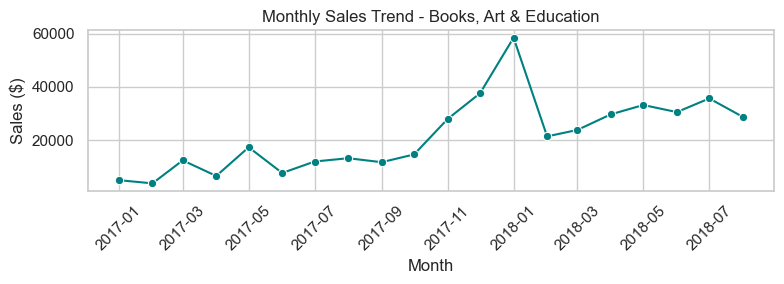

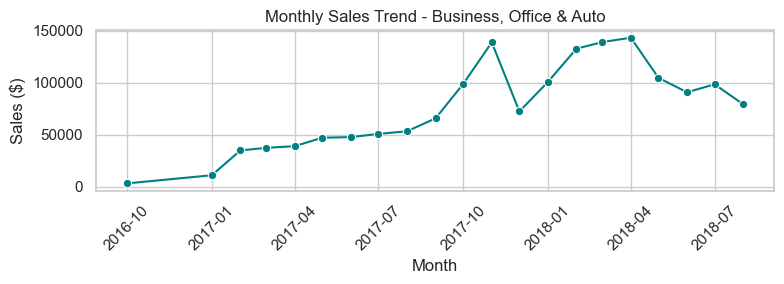

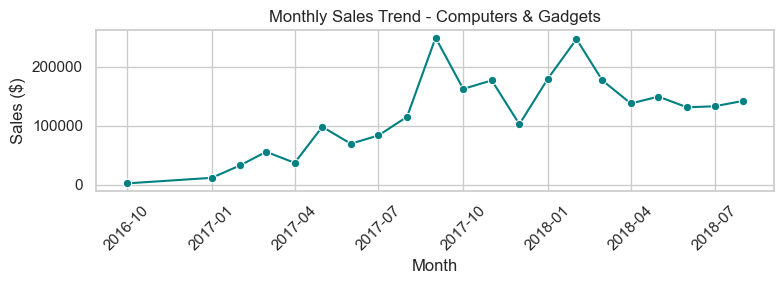

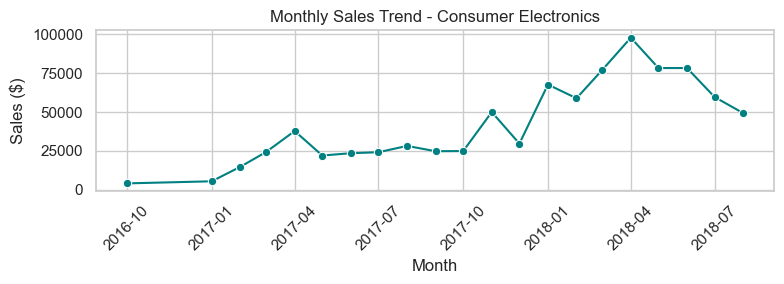

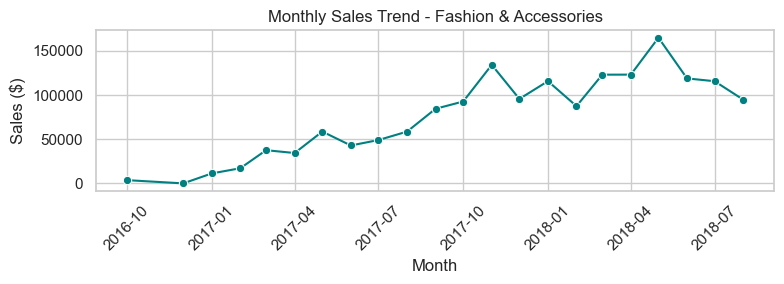

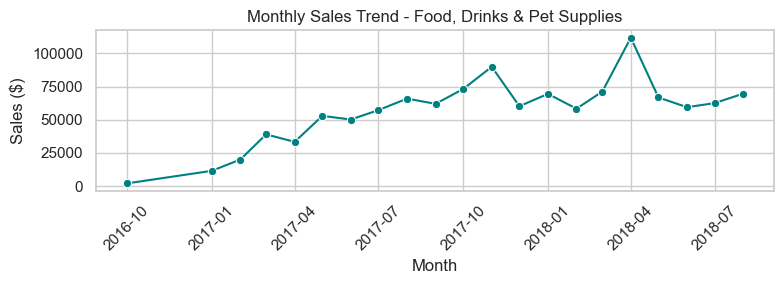

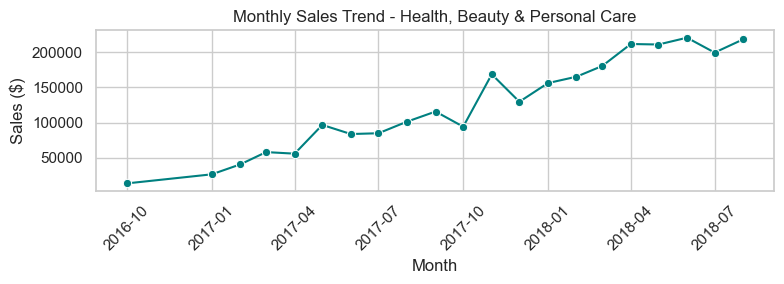

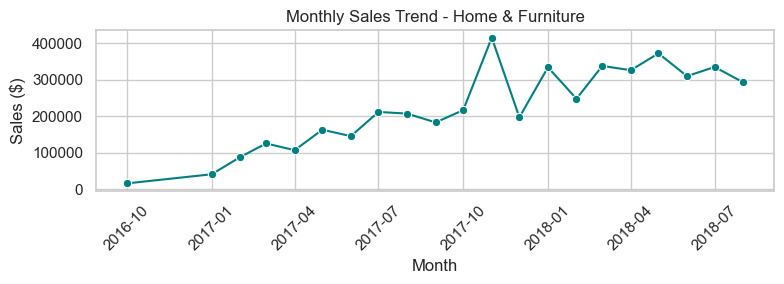

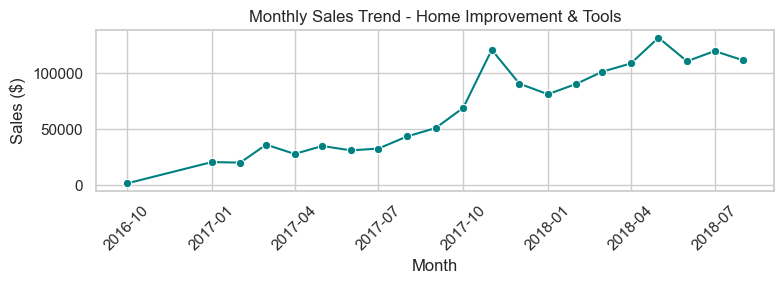

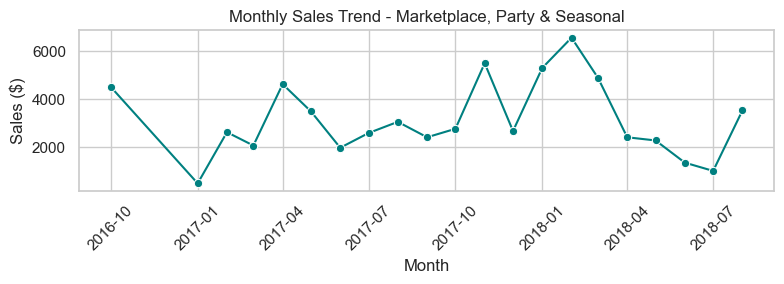

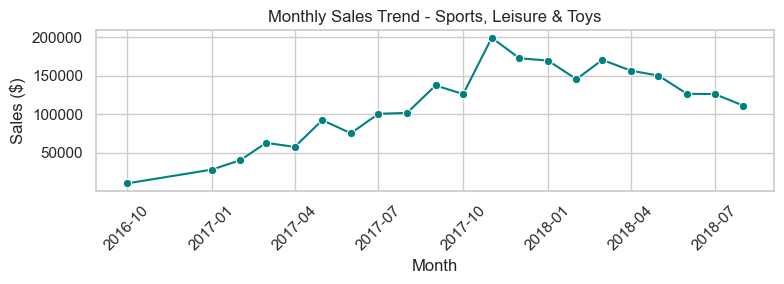

In [304]:
# Convert datetime and create year-month column
Final_Data['order_purchase_timestamp'] = pd.to_datetime(Final_Data['order_purchase_timestamp'])
Final_Data['year_month'] = Final_Data['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Convert year_month columns to datetime
Final_Data['year_month'] = pd.to_datetime(Final_Data['year_month'])

# Figure out monthly sales by product category
monthly_sales = Final_Data.groupby(['product_main_category','year_month'])['payment_value'].sum().reset_index().rename(columns = {'payment_value':'monthly_sales'})

categories = monthly_sales ['product_main_category'].unique()

#Plot each category
for category in categories:
    data = monthly_sales[monthly_sales['product_main_category'] == category]

    plt.figure(figsize = (8,3))
    sns.lineplot(data = data, x = 'year_month',y = 'monthly_sales', marker = 'o', color = 'teal')
    plt.title(f"Monthly Sales Trend - {category}")
    plt.xlabel('Month')
    plt.ylabel('Sales ($)')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()



#### Category-wise Seasonality Insights
- Marketplace, Party & Seasonal: Spike post-New Year, then sharp drop — strong seasonal demand.
- Sports, Leisure & Toys: Peak in Nov–Dec — driven by holiday gifting.
- Books, Art & Education: Jan spike — likely from New Year learning goals.
- Business, Office & Auto: High sales in Q1 & Q4 — aligns with corporate budgets and year-end spending.
- Consumer Electronics: Flat till Nov 2017, then peak in April 2018 — possibly tax refunds or tech launches.
- Home & Furniture / Tools: Steady growth, small Nov peak — renovation or gifting season.
- Fashion, Food, Beauty: Gradual rise — consistent, growing demand year-round.

#### Implications for Olist
- Focus marketing and inventory on category-specific peak months.
- Run seasonal promotions (e.g. Q4 for gifts, Q1 for office/learning).
- Strengthen logistics ahead of key spikes to boost sales and customer satisfaction.



### 3. CUSTOMER SEGMENTATION

In [292]:
# Figuring out customers having less order frequency and high purchase value

Df_Customer = Final_Data.groupby(['customer_id_short','product_category']).agg(Total_Spent = ("payment_value",'sum'),Order_Frequency = ('customer_id_short','count'), avg_review = ('review_score', 'mean'),delivery_delay = ('delivery_delay','mean')).reset_index()
Df_Customer1 = Df_Customer[(Df_Customer['Total_Spent'] > 10000) & (Df_Customer['Order_Frequency'] >= 10) ]
Df_Customer1 = Df_Customer1.set_index('customer_id_short').sort_values('Total_Spent', ascending = False)
Df_Customer1

,product_category,Total_Spent,Order_Frequency,avg_review,delivery_delay
customer_id_short,,,,,
c10022,computers_accessories,44048.00,20,1.0,0.0
c86050,drinks,30186.00,10,5.0,0.0
c56811,office_furniture,22346.60,10,1.0,0.0
c41990,office_furniture,21874.05,11,3.0,0.0
c33238,bed_bath_table,18786.90,22,1.0,0.0
c24495,furniture_decor,18384.75,15,5.0,0.0
c21425,watches_gifts,17786.88,12,1.0,0.0
c91514,computers_accessories,17671.00,10,1.0,0.0
c36654,baby,14963.64,12,4.0,0.0


- **High-Value Customers**  : A few customers (e.g., `c10022`, `c86050`) contribute significantly to revenue. Recommend loyalty or VIP programs.

- **Category Loyalty** : Customers tend to spend heavily in one product category. Use this for personalized offers and recommendations.

- **Satisfaction Mismatch** : Some high spenders gave low review scores (e.g., `avg_review = 1.0`). Suggest follow-up actions to improve retention.

- **Efficient Delivery** : All customers had zero delivery delay — logistics are strong and can be highlighted in marketing.

- **Review Score Polarization** : Most ratings are either very low or very high. Indicates inconsistent product or service quality.

- **Moderate Purchase Frequency** : With 10–22 orders per customer, there's potential to increase order frequency via targeted campaigns.


### 4. SELLER PERFORMANCE

### i. Identify high performing sellers

/var/folders/6r/x6qm1ldj3712kcmmxwrr5ydc0000gn/T/ipykernel_32991/2250202682.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10_high_review_seller.index, rotation=45, ha='right')


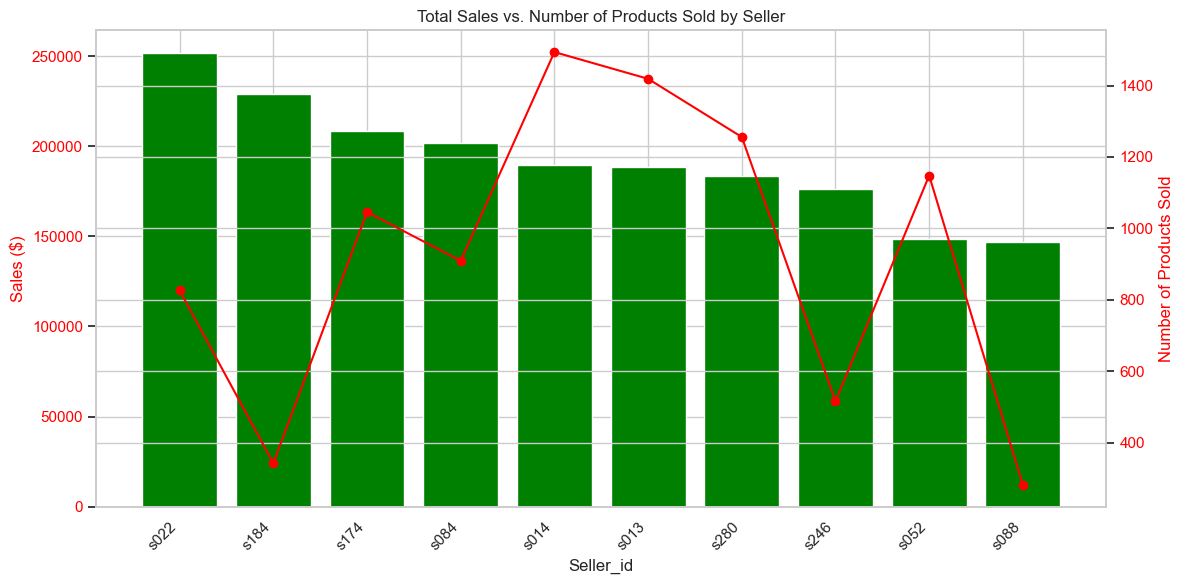

In [305]:
# Filter data based on high reviews
high_review_seller = Final_Data[Final_Data['review_score'] >= 4]
# Group data based on seller id and figure out total sales and number of products sold per each seller
high_review_seller1 = high_review_seller.groupby('seller_id_short').agg(no_of_products_sold = ('product_id','count'),sales = ('payment_value','sum'))
# Filter data based on high sales value and high number of orders
top10_high_review_seller = high_review_seller1[(high_review_seller1['sales'] >= 100000) ].sort_values('sales',ascending = False).head(10)


# Set up plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for sales in millions
ax1.bar(top10_high_review_seller.index, top10_high_review_seller['sales'], color='green')
ax1.set_xlabel('Seller_id')
ax1.set_ylabel('Sales ($)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(top10_high_review_seller.index, rotation=45, ha='right')

# Line plot for number of products sold
ax2 = ax1.twinx()
ax2.plot(top10_high_review_seller.index, top10_high_review_seller['no_of_products_sold'], color='red', marker='o')
ax2.set_ylabel('Number of Products Sold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Total Sales vs. Number of Products Sold by Seller')
plt.tight_layout()
plt.show()


- The above graph indicates high-performing sellers with positive customer reviews. 
- These sellers (e.g., s022, s182, s014) consistently generate high revenue and order volumes, indicating strong customer trust and operational efficiency.
- The platform should consider offering them incentives, featured placement, or early access to campaigns to maximize sales potential and retain seller loyalty.
- Olist should also analyse these sellers’ strategies (pricing, product range, customer service) to replicate success across other sellers.

### ii. Identify underperforming sellers in terms of low rating, low sales and less orders

- Approximately **8.5% of sellers** have low performance — characterized by **low review scores, low sales, and fewer product transactions**.
- Though a **small segment**, these sellers may negatively affect **customer satisfaction and platform reputation**.
- **Recommended Actions**:
  - Offer **targeted training or support** to help improve performance.
  - Enable **seller dashboards** to track their own performance metrics.
  - Introduce **minimum quality thresholds** and conduct regular reviews.
- Addressing this segment can lead to a **more reliable seller ecosystem** and improved customer experience.

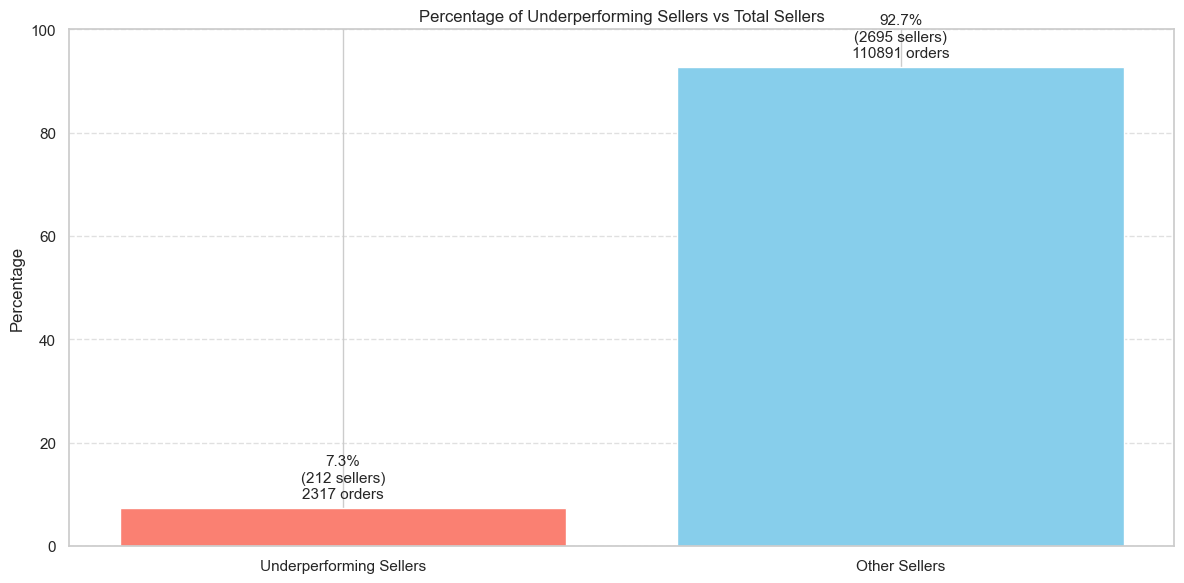

In [333]:

# Group data based on seller id and figure out total sales and number of products sold per each seller
grouped_data = Final_Data.groupby('seller_id_short').agg(no_of_products_sold = ('product_id','count'),avg_review = ('review_score','mean'),sales = ('payment_value','sum'))
# Filter data based on low sales value and low number of orders
underperforming_sellers = grouped_data[(grouped_data['no_of_products_sold']< 100) & (grouped_data['avg_review'] <= 2) ].sort_values('sales',ascending = True)

# Figure out percentage of underperforming sellers
# Total unique sellers in the entire dataset
total_sellers = Final_Data['seller_id_short'].nunique()

# Underperforming sellers count is already calculated earlier
underperforming_count = underperforming_sellers.shape[0]

# Calculate percentage
percent_under_total = (underperforming_count / total_sellers) * 100

Final_Data['seller_type'] = Final_Data['seller_id_short'].apply(
    lambda x: 'Underperforming Sellers' if x in underperforming_sellers.index else 'Other Sellers'
)

# Step 2: Group by seller type to get total number of orders
order_counts = Final_Data.groupby('seller_type')['order_id'].count().reset_index()
order_counts.columns = ['Category', 'Order_Count']  # Changed column name to avoid conflict

# Merge with explicit suffixes to avoid conflicts
bar_data = bar_data.merge(order_counts, on='Category', suffixes=('', '_new'))

plt.figure(figsize=(12, 6))
bars = plt.bar(bar_data['Category'], bar_data['Percentage'], color=['salmon', 'skyblue'])

# Annotate with percentage, seller count, and order count
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = bar_data['Count'][i]
    orders = bar_data['Order_Count'][i]  # Use the new column name
    label = f'{height:.1f}%\n({count} sellers)\n{orders} orders'
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        label,
        ha='center',
        fontsize=11
    )

plt.title('Percentage of Underperforming Sellers vs Total Sellers')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 5. REGIONAL ANALYSIS

### Find top 5 performing state with top 5 products

/var/folders/6r/x6qm1ldj3712kcmmxwrr5ydc0000gn/T/ipykernel_13208/4074553950.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/6r/x6qm1ldj3712kcmmxwrr5ydc0000gn/T/ipykernel_13208/4074553950.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/6r/x6qm1ldj3712kcmmxwrr5ydc0000gn/T/ipykernel_13208/4074553950.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/6r/x6qm1ldj3712kcmmxwrr5ydc0000gn/T/ipykernel_13208/4074553950.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

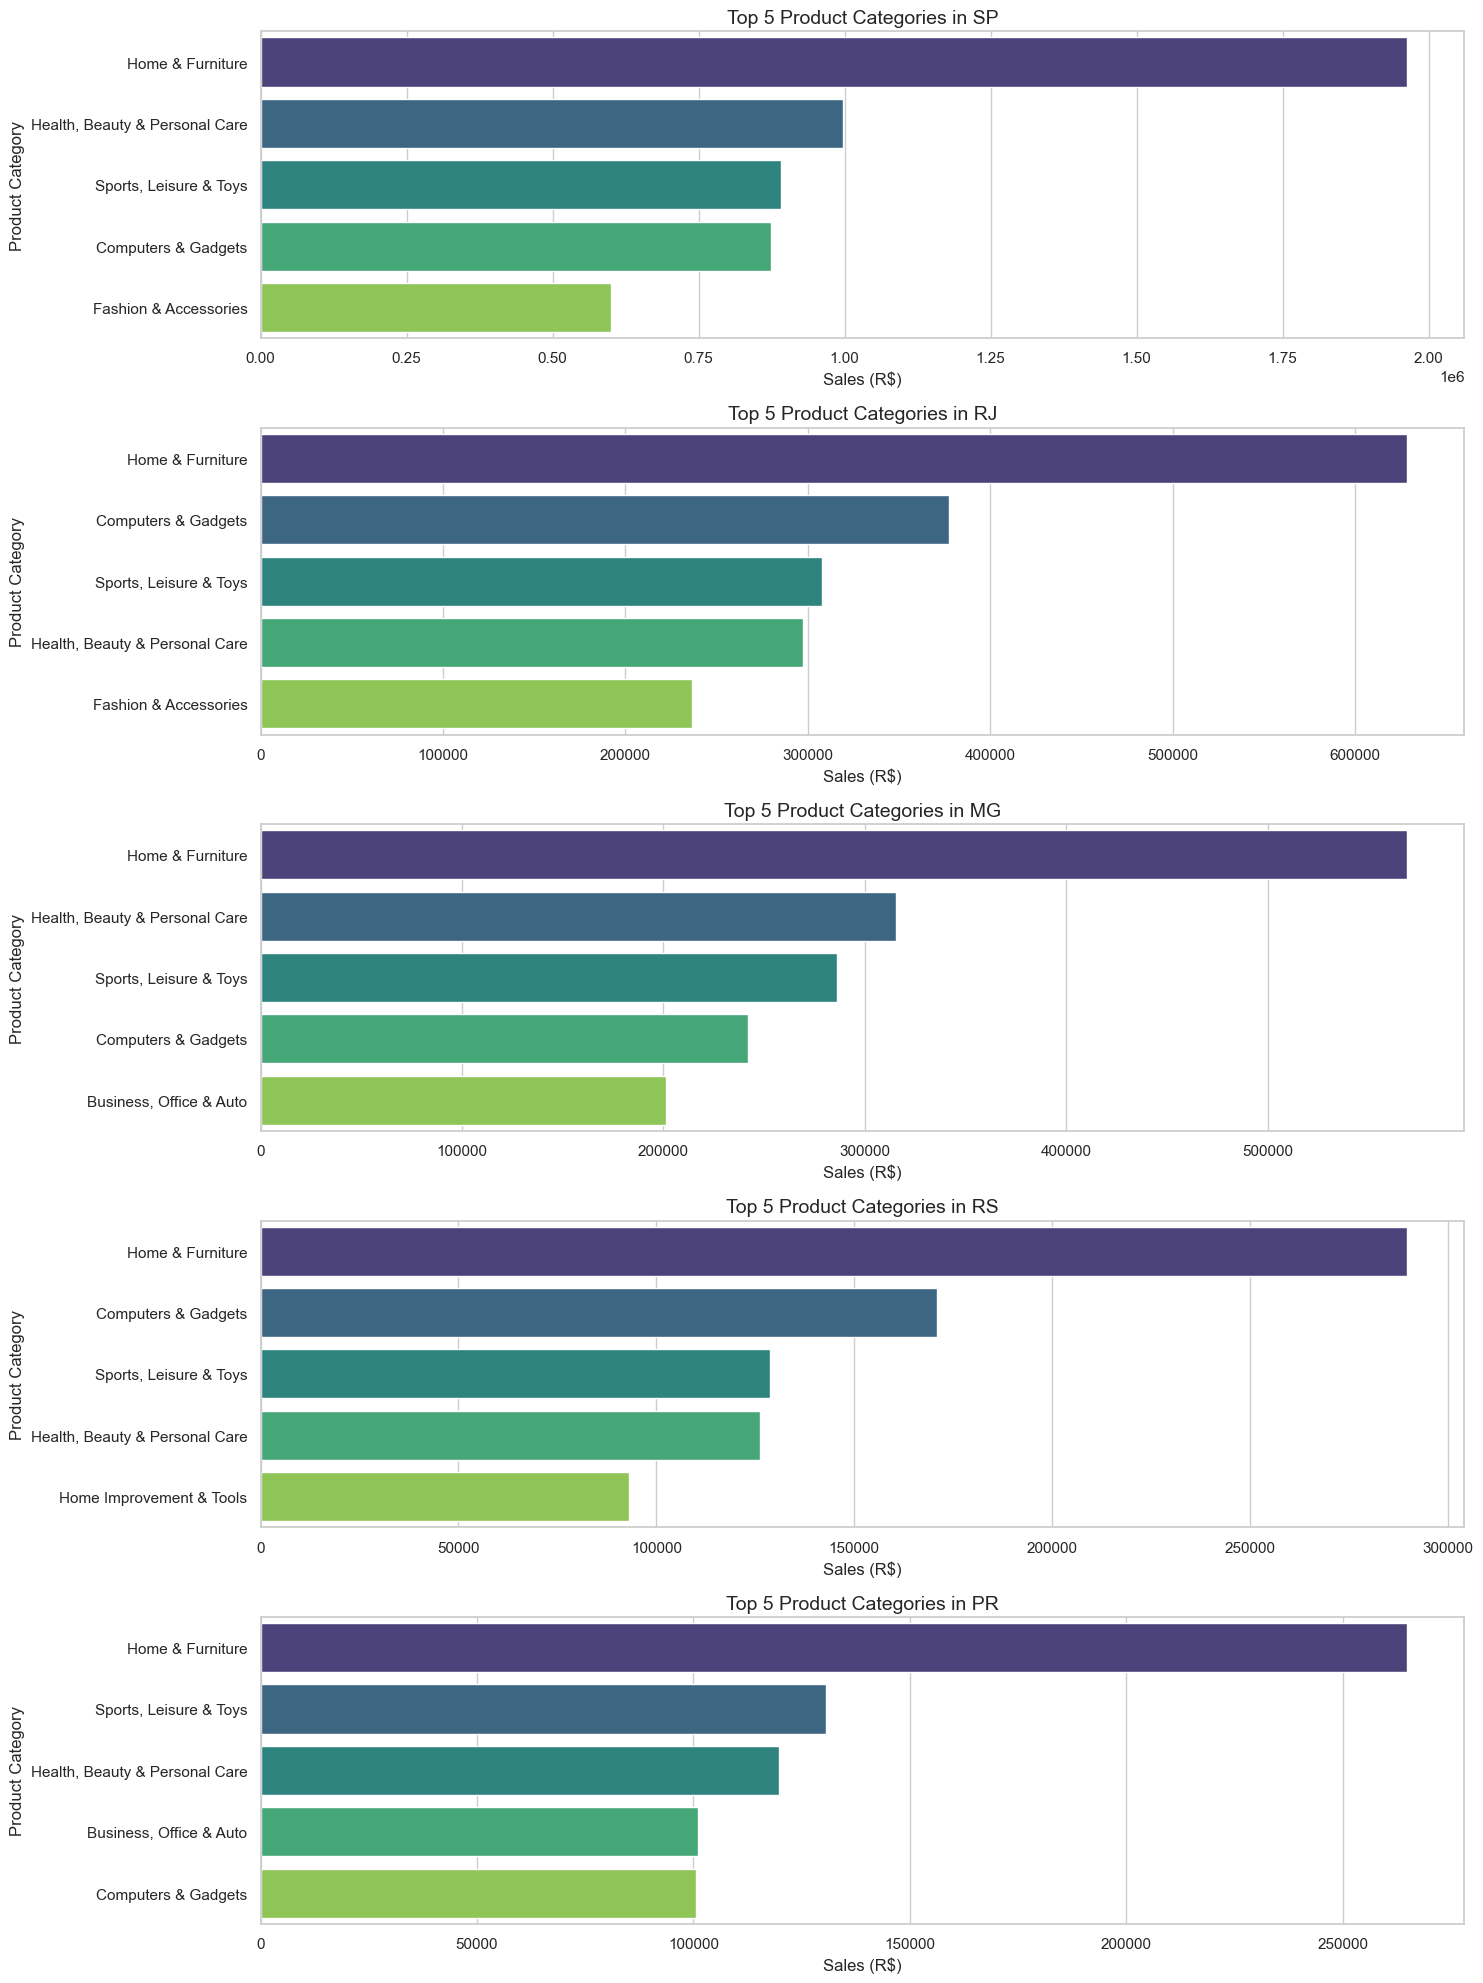

In [44]:
# Total sales per state
state_sales = (
    Final_Data.groupby('customer_state')['payment_value']
    .sum()
    .reset_index()
    .sort_values(by='payment_value', ascending=False)
)

# Top 5 states
top5_states = state_sales.head(5)['customer_state'].tolist()

# Filter for top 5 states
top_states_data = Final_Data[Final_Data['customer_state'].isin(top5_states)]

# Group by state and product category
top_state_product_sales = (
    top_states_data.groupby(['customer_state', 'product_main_category'])['payment_value']
    .sum()
    .reset_index()
)

# Get top 5 products per state
top5_products_per_state = (
    top_state_product_sales.sort_values(['customer_state', 'payment_value'], ascending=[True, False])
    .groupby('customer_state')
    .head(5)
    .reset_index(drop=True)
)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 20))

# Create subplots: one per state
for i, state in enumerate(top5_states):
    plt.subplot(len(top5_states), 1, i + 1)
    data = top5_products_per_state[top5_products_per_state['customer_state'] == state]
   
    sns.barplot(
        data=data,
        y='product_main_category',  # Horizontal bar chart
        x='payment_value',
        palette='viridis'
    )
   
    plt.title(f"Top 5 Product Categories in {state}", fontsize=14)
    plt.xlabel('Sales (R$)')
    plt.ylabel('Product Category')

plt.tight_layout()
plt.show()

- **Home & Furniture** is the top-selling category across all states – strong national demand.
- **Health, Beauty & Personal Care** performs well in SP, MG, PR but underperforms in RS and RJ.
- **Computers & Gadgets** is strong only in RJ; weaker in other states.
- **Sports, Leisure & Toys** shows consistent demand in all regions.
- **Fashion & Accessories** underperforms in all states, more business oppertunities in this segment.

***Action Plan***:
- **Fashion Expansion**: Promote using geo-targeted ads and local influencers.
- **Beauty & Personal Care Push**: Run campaigns in RS and RJ with bundled offers or trial kits.
- **Tech Product Bundling**: Target MG and PR with home-office kits (e.g., laptops + chairs).
- **Furniture Logistics**: Invest in fast delivery infrastructure for high-demand regions.
- **Regional Strategy**: Tailor marketing and inventory based on top categories by state.



## 6. BUSINESS INSIGHTS


In [10]:
model_df = numerical_data

In [11]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113208 entries, 0 to 113207
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   price                          113208 non-null  float64
 1   freight_value                  113208 non-null  float64
 2   product_photos_qty             113208 non-null  float64
 3   product_weight_g               113208 non-null  float64
 4   Product_Volume                 113208 non-null  float64
 5   payment_installments           113208 non-null  int64  
 6   payment_value                  113208 non-null  float64
 7   review_score                   113208 non-null  float64
 8   actual_delivery_time(days)     113208 non-null  int64  
 9   estimated_delivery_time(days)  113208 non-null  int64  
 10  delivery_delay                 113208 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 9.5 MB


In [22]:
#Group the model dataset by the purchase date
numeric_columns = Final_Data.select_dtypes(include=['number']).columns
Model_df = Final_Data.groupby("order_purchase_timestamp")[numeric_columns].mean()


In [33]:
Model_df1 = Model_df.drop(columns = ['product_photos_qty','actual_delivery_time(days)', 'estimated_delivery_time(days)'])
Model_df2 = Model_df1.drop(columns = ['product_weight_g','Product_Volume'])

In [34]:
y = Model_df2['payment_value']
X = Model_df2.drop('payment_value',axis = 1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [41]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression
# Import metrics for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Build Linear Regression
linear_model = LinearRegression()

#Fit Model to train dataset
linear_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds1 = linear_model.predict(X_test)
print(mean_absolute_error(y_test, sales_preds1))
print(r2_score(y_test, sales_preds1))
print(mean_squared_error(y_test, sales_preds1))

24.889016937694223
0.8677691238292213
6165.750598952196


In [37]:
X1 = sm.add_constant(X)
regression_model = sm.OLS(y,X1).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 9.661e+04
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:53:24   Log-Likelihood:            -5.5282e+05
No. Observations:               93988   AIC:                         1.106e+06
Df Residuals:                   93982   BIC:                         1.106e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   29.6589      1.111     26.686      0.000      27.481      31.837
price                    0.9897      0.002    575.645      0.000       0.986       0.993
freight_value            1.1283      0.020     56.465      0.000       1.089       1.167
payment_installments     2.5829      0.111     23.258      0.000       2.365       2.801
review_score            -6.2776      0.230    -27.335      0.000      -6.728      -5.828
delivery_delay          -0.6434      0.063    -10.142      0.000      -0.768      -0.519
==============================================================================
Omnibus:                   269537.677   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      70146307696.991
Skew:                          38.142   Prob(JB):                         0.00
Kurtosis:                    4234.567   Cond. No.                         905.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 600x400 with 0 Axes>

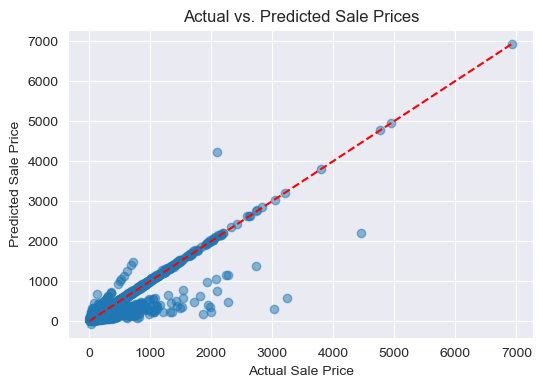

In [42]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, sales_preds1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.show()

## 6. BUSINESS INSIGHTS

# Strategic Recommendations to Increase Sales over next two years

- Focus on high-demand regions like São Paulo, Rio de Janeiro, and Minas Gerais by investing in regional warehouses and onboarding local sellers to reduce delivery times and boost customer satisfaction.  
- Expand high-converting product categories such as Electronics, Home & Furniture, Fashion, and Sports by promoting bundled offers, discounts, and maintaining consistent stock availability.  
- Improve underperforming product listings in categories with high sales but low reviews (e.g., fixed telephony) by collaborating with sellers to enhance product quality, update descriptions, and improve packaging.  
- Leverage high-value customers who spend significantly in fewer orders by launching loyalty programs and VIP incentives that provide early access to deals and exclusive offers, to encourage retention and upselling.  
- Capitalize on seasonal and event-based sales trends (e.g., toys in November–December, books in January) through targeted marketing campaigns aligned with holidays, back-to-school, and New Year themes.  
- Optimize seller performance by providing analytics tools to all sellers and retraining or unlisting underperformers to maintain marketplace quality and maximize revenue.
- Focus on pricing and installment plans to boost revenue.
- Improve satisfaction for high-ticket items.
- Reduce delivery delays to avoid lost sales.
- Combining these initiatives across regions, product categories, customers, seasons, and sellers can drive a sustainable 20% increase in sales for Olist.